<a href="https://colab.research.google.com/github/FeraMaks/test/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22NN_ShaftTraectory_2_4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
from numpy.core.memmap import uint8

from google.colab import drive

In [2]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


##Загрузка данных

Эллиптические графики

In [4]:
# Советую воспользоваться циклом for, чтобы не писать множество однотипных строк кода

data1 = pd.read_excel(open('/content/drive/MyDrive/work/02/001_19-12-03_1728_009-50_000.xlsx', 'rb'))
data1 = pd.DataFrame(data1)
data1 = pd.DataFrame.to_numpy(data1)
data1 = np.rot90(data1)
data1.shape

(6, 20000)

In [5]:
data2 = pd.read_excel(open('/content/drive/MyDrive/work/02/001_19-12-05_1704_020_000.xlsx', 'rb'))
data2 = pd.DataFrame(data2)
data2 = pd.DataFrame.to_numpy(data2)
data2 = np.rot90(data2)
data2.shape

(6, 20000)

In [6]:
data3 = pd.read_excel(open('/content/drive/MyDrive/work/02/001_19-12-05_1704_021_000.xlsx', 'rb'))
data3 = pd.DataFrame(data3)
data3 = pd.DataFrame.to_numpy(data3)
data3 = np.rot90(data3)
data3.shape

(6, 20000)

In [7]:
data4 = pd.read_excel(open('/content/drive/MyDrive/work/02/001_19-12-05_1744_017-330_000.xlsx', 'rb'))
data4 = pd.DataFrame(data4)
data4 = pd.DataFrame.to_numpy(data4)
data4 = np.rot90(data4)
data4.shape

(6, 20000)

In [8]:
data5 = pd.read_excel(open('/content/drive/MyDrive/work/02/001_19-12-05_1746_021_000.xlsx', 'rb'))
data5 = pd.DataFrame(data5)
data5 = pd.DataFrame.to_numpy(data5)
data5 = np.rot90(data5)
data5.shape

(6, 20000)

In [9]:
data6 = pd.read_excel(open('/content/drive/MyDrive/work/02/001_19-12-05_1748_027-360_000.xlsx', 'rb'))
data6 = pd.DataFrame(data6)
data6 = pd.DataFrame.to_numpy(data6)
data6 = np.rot90(data6)
data6.shape

(6, 20000)

In [10]:
data7 = pd.read_excel(open('/content/drive/MyDrive/work/02/001_19-12-05_1801_062-480_000.xlsx', 'rb'))
data7 = pd.DataFrame(data7)
data7 = pd.DataFrame.to_numpy(data7)
data7 = np.rot90(data7)
data7.shape

(6, 20000)

In [11]:
data8 = pd.read_excel(open('/content/drive/MyDrive/work/02/100_000.xlsx', 'rb'))
data8 = pd.DataFrame(data8)
data8 = pd.DataFrame.to_numpy(data8)
data8 = np.rot90(data8)
data8.shape

(6, 20000)

In [12]:
data9 = pd.read_excel(open('/content/drive/MyDrive/work/02/110_000.xlsx', 'rb'))
data9 = pd.DataFrame(data9)
data9 = pd.DataFrame.to_numpy(data9)
data9 = np.rot90(data9)
data9.shape

(6, 20000)

In [13]:
data10 = pd.read_excel(open('/content/drive/MyDrive/work/02/120_000.xlsx', 'rb'))
data10 = pd.DataFrame(data10)
data10 = pd.DataFrame.to_numpy(data10)
data10 = np.rot90(data10)
data10.shape

(6, 20000)

Метастабильные графики

In [14]:
data11 = pd.read_excel(open('/content/drive/MyDrive/work/22/001_19-12-05_1625_001_222.xlsx', 'rb'))
data11 = pd.DataFrame(data11)
data11 = pd.DataFrame.to_numpy(data11)
data11 = np.rot90(data11)
data11.shape

(6, 20000)

In [15]:
data12 = pd.read_excel(open('/content/drive/MyDrive/work/22/001_19-12-05_1625_002-10_222.xlsx', 'rb'))
data12 = pd.DataFrame(data12)
data12 = pd.DataFrame.to_numpy(data12)
data12 = np.rot90(data12)
data12.shape

(6, 20000)

In [16]:
data13 = pd.read_excel(open('/content/drive/MyDrive/work/22/001_19-12-05_1625_003_222.xlsx', 'rb'))
data13 = pd.DataFrame(data13)
data13 = pd.DataFrame.to_numpy(data13)
data13 = np.rot90(data13)
data13.shape

(6, 20000)

In [17]:
data14 = pd.read_excel(open('/content/drive/MyDrive/work/22/001_19-12-05_1737_016_222.xlsx', 'rb'))
data14 = pd.DataFrame(data14)
data14 = pd.DataFrame.to_numpy(data14)
data14 = np.rot90(data14)
data14.shape

(6, 20000)

In [18]:
data15 = pd.read_excel(open('/content/drive/MyDrive/work/22/001_19-12-05_1739_005-290_222.xlsx', 'rb'))
data15 = pd.DataFrame(data15)
data15 = pd.DataFrame.to_numpy(data15)
data15 = np.rot90(data15)
data15.shape

(6, 20000)

In [19]:
data16 = pd.read_excel(open('/content/drive/MyDrive/work/22/001_19-12-05_1739_006_222.xlsx', 'rb'))
data16 = pd.DataFrame(data16)
data16 = pd.DataFrame.to_numpy(data16)
data16 = np.rot90(data16)
data16.shape

(6, 20000)

In [20]:
data17 = pd.read_excel(open('/content/drive/MyDrive/work/22/21_222.xlsx', 'rb'))
data17 = pd.DataFrame(data17)
data17 = pd.DataFrame.to_numpy(data17)
data17 = np.rot90(data17)
data17.shape

(6, 20000)

In [21]:
data18 = pd.read_excel(open('/content/drive/MyDrive/work/22/22_222.xlsx', 'rb'))
data18 = pd.DataFrame(data18)
data18 = pd.DataFrame.to_numpy(data18)
data18 = np.rot90(data18)
data18.shape

(6, 20000)

In [22]:
data19 = pd.read_excel(open('/content/drive/MyDrive/work/22/23_222.xlsx', 'rb'))
data19 = pd.DataFrame(data19)
data19 = pd.DataFrame.to_numpy(data19)
data19 = np.rot90(data19)
data19.shape

(6, 20000)

In [23]:
data20 = pd.read_excel(open('/content/drive/MyDrive/work/22/260_222.xlsx', 'rb'))
data20 = pd.DataFrame(data20)
data20 = pd.DataFrame.to_numpy(data20)
data20 = np.rot90(data20)
data20.shape

(6, 20000)

Графики на валидацию

In [24]:
data21 = pd.read_excel(open('/content/drive/MyDrive/work/0/0330.xlsx', 'rb'))
data21 = pd.DataFrame(data21)
data21 = pd.DataFrame.to_numpy(data21)
data21 = np.rot90(data21)
data21.shape

(6, 20000)

In [25]:
data22 = pd.read_excel(open('/content/drive/MyDrive/work/0/0350.xlsx', 'rb'))
data22 = pd.DataFrame(data22)
data22 = pd.DataFrame.to_numpy(data22)
data22 = np.rot90(data22)
data22.shape

(6, 20000)

In [26]:
data23 = pd.read_excel(open('/content/drive/MyDrive/work/2/330.xlsx', 'rb'))
data23 = pd.DataFrame(data23)
data23 = pd.DataFrame.to_numpy(data23)
data23 = np.rot90(data23)
data23.shape

(6, 20000)

In [27]:
data24 = pd.read_excel(open('/content/drive/MyDrive/work/2/350.xlsx', 'rb'))
data24 = pd.DataFrame(data24)
data24 = pd.DataFrame.to_numpy(data24)
data24 = np.rot90(data24)
data24.shape

(6, 20000)

##Подготовка датасета

In [28]:
#parameters
data_train_number = 20 # количество файлов с графиками на обучение
data_test_number = 4 # количество файлов с графиками на валидацию
num_samples = 10 # количество сэмплов в одном графике
point_number = 2000 # количество точек в одном графике
num_graphycs = 3 # количество графиков
num_grahp0 = 3 # кол-во эллиптических графиков
num_grahp2 = 3 # кол-во метастабильных графиков
inputs = []
inputs_test = []

Data for training

In [29]:
y0_train = np.zeros((num_grahp0*num_samples*10,1))
y2_train = np.ones((num_grahp2*num_samples*10,1))
y_train = np.concatenate((y0_train, y2_train))
#for i in range (5):
#  y = np.concatenate((y, y))
y_train, y_train.shape

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [30]:
data_x_train = np.concatenate((data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14,data15,data16,data17,data18,data19,data20))
data_x_train.shape

(120, 20000)

In [31]:
for j in range (data_train_number*num_graphycs):
  for i in range (num_samples):
    inputs.append(np.concatenate((data_x_train[j*2,i*point_number:i*point_number+point_number], data_x_train[j*2+1,i*point_number:i*point_number+point_number])))
inputs = np.concatenate(inputs, axis=0)
x_train = np.reshape(inputs, (data_train_number*num_graphycs*num_samples,point_number*2))
# Тип данных  в нейросетях - float32. Можно и float64, но тогда модель нужно делать с таким типом данных.
#x = x.astype('float32')
x_train.shape

(600, 4000)

In [32]:
data_train = np.concatenate((y_train,x_train), axis=1)
data_train[0,:]

array([   0.      ,  161.99277 ,  169.586835, ..., -905.38518 ,
       -906.81915 , -908.358855])

In [33]:
data_train = sorted(data_train, key=lambda x: random.random())

In [34]:
data_train = np.asarray(data_train)
data_train.shape

(600, 4001)

In [35]:
x_train, y_train = data_train[:,1:], data_train[:,0]
x_train = x_train.astype('float32')
y_train = y_train.astype('int64')
x_train.shape, y_train.shape

((600, 4000), (600,))

Data for validation

In [36]:
y0_test = np.zeros((num_grahp0*num_samples*2,1))
y2_test = np.ones((num_grahp2*num_samples*2,1))
y_test = np.concatenate((y0_test, y2_test))
#for i in range (5):
#  y = np.concatenate((y, y))
y_test, y_test.shape

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [37]:
data_x_test = np.concatenate((data21,data22,data23,data24))
data_x_test.shape

(24, 20000)

In [38]:
for j in range (data_test_number*num_graphycs):
  for i in range (num_samples):
    inputs_test.append(np.concatenate((data_x_test[j*2,i*point_number:i*point_number+point_number], data_x_test[j*2+1,i*point_number:i*point_number+point_number])))
inputs_test = np.concatenate(inputs_test, axis=0)
x_test = np.reshape(inputs_test, (data_test_number*num_graphycs*num_samples,point_number*2))
# Тип данных  в нейросетях - float32. Можно и float64, но тогда модель нужно делать с таким типом данных.
#x = x.astype('float32')
x_test.shape

(120, 4000)

In [39]:
data_test = np.concatenate((y_test,x_test), axis=1)
data_test[0,:]

array([   0.        , -696.13182   , -688.57759125, ..., -321.882075  ,
       -329.0082075 , -336.07596375])

In [40]:
data_test = sorted(data_test, key=lambda x: random.random())

In [41]:
data_test = np.asarray(data_test)
data_test.shape

(120, 4001)

In [42]:
x_test, y_test = data_test[:,1:], data_test[:,0]
x_test = x_test.astype('float32')
y_test = y_test.astype('int64')
x_test.shape, y_test.shape

((120, 4000), (120,))

In [43]:
# Индексация классов начиается с нуля. То есть первый класс - 0, второй класс - 1. Тип данных разметки - int64.
# Размерность у разметки должна быть одна

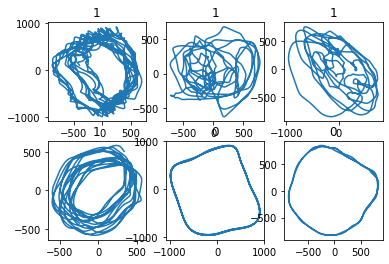

In [44]:
for i in range (6):
  plt.subplot(2, 3, i+1)
  plt.title(y_train[i])
  plt.plot(x_train[i,:1999], x_train[i,2000:3999], color='tab:blue')
plt.show()

In [45]:
# Тут и далее уже очень много ошибок, покажу просто как правильно с комментариями.

class ShaftDataset(Dataset):
    def __init__(self, x, y, mode):
        # Проверка выборки
        if mode == 'train':
            self.x = x_train
            self.y = y_train
        elif mode == 'val':
            self.x = x_test
            self.y = y_test
            
        # Разбиение сделано по вашему примеру, но обращаю внимание,
        # что так в тренировочной выборке всего один пример со 2 классом. А в тестовой - только 2 класс/
        # Поэтому нужно как то примеры скомпоновать по-другому

    def __getitem__(self, index):
        return self.x[index], self.y[index]
  
    def __len__(self):
        return len(self.y)

In [46]:
# Создаем два отдельных датасета и их будем подавать в Loader.
# Изначально вы пытались сделать два среза по одному датасету и подавили в Loader. Так работать не будет

train_dataset = ShaftDataset(x_train, y_train, 'train')
test_dataset = ShaftDataset(x_test, y_test, 'val')


In [47]:
train_dataset[0]

(array([-400.19162, -416.31567, -428.6641 , ..., -315.61697, -342.61414,
        -370.12286], dtype=float32), 1)

Hyper parameters

In [48]:
input_size = x_train.shape[1]
hidden_size1 = 24 # Попробуйте для начала поменьше
hidden_size2 = 40
num_classes = 2
num_epochs = 1000
batch_size = 15 # Bath size не может быть больше размера датасета (у вас 30 примеров)
lr = 0.00005 # learning rate

In [49]:
# Loader генерирует тензоры следующего размера -
# (batch_size (размер батча - кол-во примеров в батче), m (кол-во признаков))
# Таким образом, размерностей 2, а не 4

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [50]:
# Размеры данных в датасетах

features, labels = train_dataset.x, train_dataset.y
print(features.shape, labels.shape)
features, labels = test_dataset.x, test_dataset.y
print(features.shape, labels.shape)
#samples = torch.from_numpy(samples)
#labels = torch.from_numpy(labels)

(600, 4000) (600,)
(120, 4000) (120,)


#Создание нейронной сети

In [64]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size1, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size1)
    self.relu = nn.ReLU()
    self.l3 = nn.Linear(hidden_size1,num_classes)
    #self.sm = nn.Softmax(dim=1)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l3(out)
    #out = self.sm(out)
    return out


In [65]:
model = NeuralNet(input_size, hidden_size1, num_classes)

# Модель также перемещаем в нужное место
model = model.to(device)

Loss and optimizer

In [66]:
L = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

#Training loop

In [67]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (features, labels) in enumerate(train_loader):
    features = features.to(device)
    labels = labels.to(device)

    #forward path
    outputs = model(features) # Подаем признаки на вход нейросети
    loss = L(outputs, labels)

    #backward path
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 16 == 0:
       print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')


epoch 1 / 1000, step 16/40, loss = 60.4793
epoch 1 / 1000, step 32/40, loss = 16.9418
epoch 2 / 1000, step 16/40, loss = 7.9439
epoch 2 / 1000, step 32/40, loss = 0.0000
epoch 3 / 1000, step 16/40, loss = 0.0000
epoch 3 / 1000, step 32/40, loss = 0.0000
epoch 4 / 1000, step 16/40, loss = 1.0896
epoch 4 / 1000, step 32/40, loss = 0.0000
epoch 5 / 1000, step 16/40, loss = 0.3827
epoch 5 / 1000, step 32/40, loss = 0.0000
epoch 6 / 1000, step 16/40, loss = 0.0162
epoch 6 / 1000, step 32/40, loss = 0.0000
epoch 7 / 1000, step 16/40, loss = 3.4864
epoch 7 / 1000, step 32/40, loss = 0.0000
epoch 8 / 1000, step 16/40, loss = 3.5445
epoch 8 / 1000, step 32/40, loss = 0.0000
epoch 9 / 1000, step 16/40, loss = 1.0631
epoch 9 / 1000, step 32/40, loss = 0.0000
epoch 10 / 1000, step 16/40, loss = 0.0000
epoch 10 / 1000, step 32/40, loss = 0.0000
epoch 11 / 1000, step 16/40, loss = 0.0000
epoch 11 / 1000, step 32/40, loss = 0.0000
epoch 12 / 1000, step 16/40, loss = 0.0000
epoch 12 / 1000, step 32/40

In [55]:
#outputs, labels

#Test

In [68]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for features, labels in test_loader:
    features = features.to(device)
    labels = labels.to(device)
    outputs = model(features)
    print(outputs)
    #value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

tensor([[ 282.5152, -207.9252],
        [ 473.6755,   34.0149],
        [ 168.1644,  230.0264],
        [ -72.1860,  -51.6655],
        [ 367.8691,  213.7846],
        [ 106.5646,  -24.4486],
        [ -94.5741,  -41.3070],
        [ -85.7306,  -39.3346],
        [ 289.1470, -175.5733],
        [ -63.6973,   43.4144],
        [-141.2023,  -65.8911],
        [-115.9336,  111.5552],
        [ 284.9597,  -95.4829],
        [ -60.3067, -112.6324],
        [  28.6220,  127.2150]])
tensor([[ -85.6820,  -78.6648],
        [  11.4857,   62.9302],
        [-185.2312,  -81.1239],
        [ -18.2820,   40.3622],
        [ 221.8199, -296.8294],
        [ 207.0099,  -34.1037],
        [ 184.0836,  -14.1877],
        [ -26.4110,  -94.3539],
        [  12.2360,  132.3382],
        [  46.0900,  -74.5275],
        [ -71.8236,  -97.8283],
        [ -52.7542,  -16.3386],
        [-157.5915,  -91.3789],
        [-154.7261,  129.5832],
        [-101.9421,  -58.9028]])
tensor([[-190.0464,  -73.7906],
      

In [69]:
  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc} %')

accuracy = 65.83333333333333 %
